<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CVassignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performance Results:

Sum of Squared Differences:
  Size 100: 0.000095 seconds
  Size 1000: 0.000666 seconds
  Size 10000: 0.000078 seconds
  Size 100000: 0.002843 seconds
  Size 1000000: 0.006111 seconds

Sum of Robust Differences:
  Size 100: 0.000022 seconds
  Size 1000: 0.000024 seconds
  Size 10000: 0.000049 seconds
  Size 100000: 0.000500 seconds
  Size 1000000: 0.008604 seconds

Sum of Absolute Differences:
  Size 100: 0.000008 seconds
  Size 1000: 0.000012 seconds
  Size 10000: 0.000029 seconds
  Size 100000: 0.000251 seconds
  Size 1000000: 0.005861 seconds


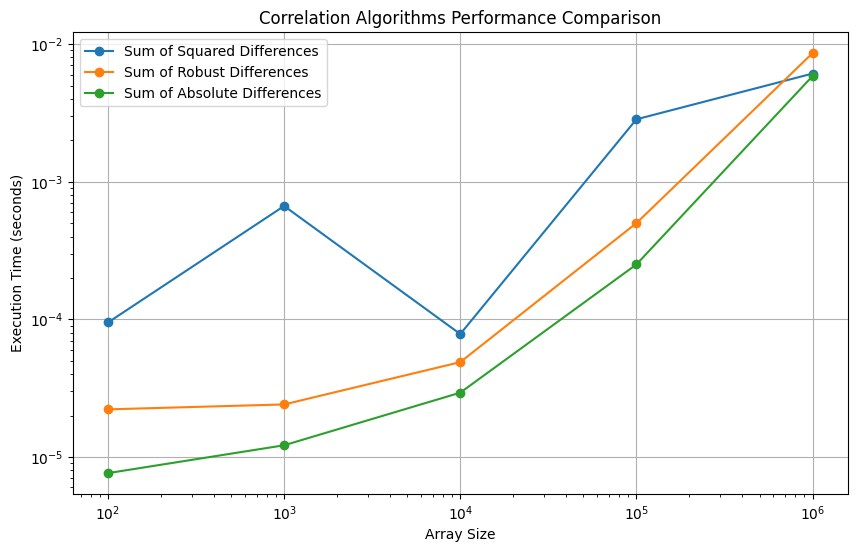

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

def sum_of_squared_differences(x, y):
    """
    Correlation algorithm 9.1: Sum of Squared Differences
    Computes the correlation based on squared differences

    Args:
        x (np.array): First input array
        y (np.array): Second input array

    Returns:
        float: Correlation metric
    """
    return np.sum((x - y)**2)

def sum_of_robust_differences(x, y):
    """
    Correlation algorithm 9.2: Sum of Robust Differences
    Computes the correlation using robust difference metric

    Args:
        x (np.array): First input array
        y (np.array): Second input array

    Returns:
        float: Correlation metric
    """
    return np.sum(np.sqrt(np.abs(x - y)))

def sum_of_absolute_differences(x, y):
    """
    Correlation algorithm 9.3: Sum of Absolute Differences
    Computes the correlation based on absolute differences

    Args:
        x (np.array): First input array
        y (np.array): Second input array

    Returns:
        float: Correlation metric
    """
    return np.sum(np.abs(x - y))


def performance_comparison(sizes=[100, 1000, 10000, 100000, 1000000]):
    """
    Compare performance of different correlation algorithms

    Args:
        sizes (list): Array sizes to test

    Returns:
        dict: Performance metrics for each algorithm
    """
    performance_results = {
        'Sum of Squared Differences': [],
        'Sum of Robust Differences': [],
        'Sum of Absolute Differences': []
    }

    algorithms = [
        sum_of_squared_differences,
        sum_of_robust_differences,
        sum_of_absolute_differences
    ]

    algorithm_names = [ # Create a list of algorithm names corresponding to the functions
        'Sum of Squared Differences',
        'Sum of Robust Differences',
        'Sum of Absolute Differences'
    ]

    for size in sizes:
        # Generate random input arrays
        x = np.random.rand(size)
        y = np.random.rand(size)

        for algo, algo_name in zip(algorithms, algorithm_names): # Iterate using both lists
            # Measure execution time
            start_time = time.time()
            algo(x, y)
            end_time = time.time()

            performance_results[algo_name].append(end_time - start_time) # Use algo_name for the key

    return performance_results

def plot_performance_results(performance_results, sizes=[100, 1000, 10000, 100000, 1000000]):
    """
    Plot performance comparison results

    Args:
        performance_results (dict): Performance metrics
        sizes (list): Array sizes tested
    """
    plt.figure(figsize=(10, 6))
    for algo, times in performance_results.items():
        plt.plot(sizes, times, marker='o', label=algo)

    plt.title('Correlation Algorithms Performance Comparison')
    plt.xlabel('Array Size')
    plt.ylabel('Execution Time (seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Performance comparison
    performance_results = performance_comparison()

    # Print detailed performance results
    print("Performance Results:")
    for algo, times in performance_results.items():
        print(f"\n{algo}:")
        for size, time_taken in zip([100, 1000, 10000, 100000, 1000000], times):
            print(f"  Size {size}: {time_taken:.6f} seconds")

    # Plot performance comparison
    plot_performance_results(performance_results)

if __name__ == "__main__":
    main()

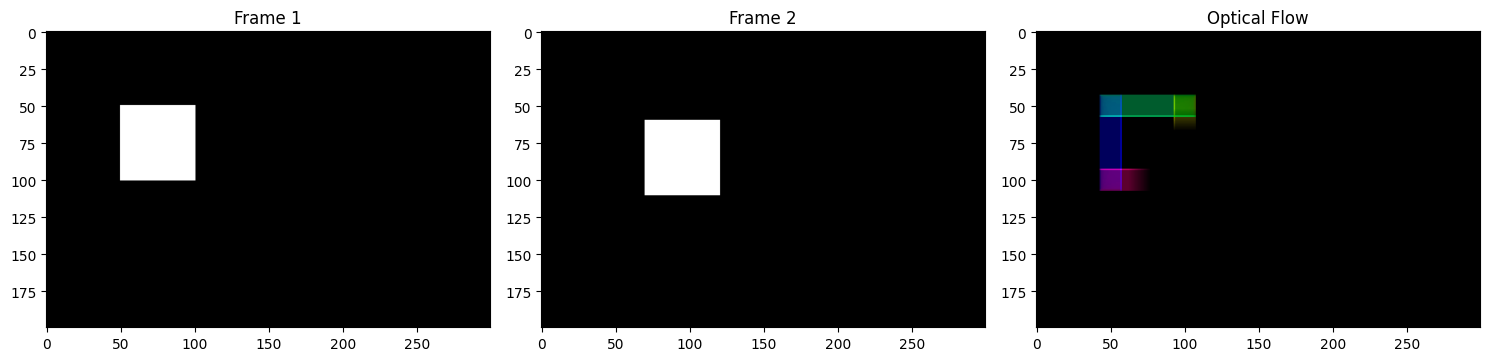

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class OpticalFlowComputer:
    def __init__(self, window_size=15, max_iterations=10, epsilon=0.01):
        """
        Initialize Optical Flow Computer with Lucas-Kanade method

        Args:
            window_size (int): Size of the neighborhood considered
            max_iterations (int): Maximum number of iterations for optimization
            epsilon (float): Convergence threshold
        """
        self.window_size = window_size
        self.max_iterations = max_iterations
        self.epsilon = epsilon

    def compute_derivatives(self, frame1, frame2):
        """
        Compute spatial and temporal image derivatives

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image

        Returns:
            tuple: Ix (x derivative), Iy (y derivative), It (temporal derivative)
        """
        # Sobel derivatives for spatial gradients
        Ix = cv2.Sobel(frame1, cv2.CV_64F, 1, 0, ksize=3)
        Iy = cv2.Sobel(frame1, cv2.CV_64F, 0, 1, ksize=3)

        # Temporal derivative
        It = frame2 - frame1

        return Ix, Iy, It

    def lucas_kanade_flow(self, frame1, frame2):
        """
        Compute optical flow using Lucas-Kanade method

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image

        Returns:
            tuple: u (x-flow), v (y-flow)
        """
        # Compute image derivatives
        Ix, Iy, It = self.compute_derivatives(frame1, frame2)

        # Initialize flow fields
        height, width = frame1.shape
        u = np.zeros((height, width), dtype=np.float32)
        v = np.zeros((height, width), dtype=np.float32)

        # Half window size
        half_window = self.window_size // 2

        # Compute flow for each pixel
        for y in range(half_window, height - half_window):
            for x in range(half_window, width - half_window):
                # Extract local image patch
                ix_patch = Ix[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()
                iy_patch = Iy[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()
                it_patch = It[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()

                # Construct linear system
                A = np.column_stack((ix_patch, iy_patch))
                b = -it_patch

                # Solve using least squares
                try:
                    flow = np.linalg.lstsq(A, b, rcond=None)[0]
                    u[y, x], v[y, x] = flow
                except np.linalg.LinAlgError:
                    u[y, x], v[y, x] = 0, 0

        return u, v

    def visualize_flow(self, frame1, frame2, u, v, title='Optical Flow'):
        """
        Visualize optical flow using color coding

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image
            u (np.ndarray): X-direction flow
            v (np.ndarray): Y-direction flow
            title (str): Plot title
        """
        # Normalize flow for visualization
        mag, ang = cv2.cartToPolar(u, v)
        hsv = np.zeros((frame1.shape[0], frame1.shape[1], 3), dtype=np.uint8)

        # Encode flow direction in hue
        hsv[..., 0] = ang * 180 / np.pi / 2
        # Encode flow magnitude in value channel
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        hsv[..., 1] = 255

        # Convert HSV to BGR
        flow_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        # Plotting
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.title('Frame 1')
        plt.imshow(frame1, cmap='gray')

        plt.subplot(132)
        plt.title('Frame 2')
        plt.imshow(frame2, cmap='gray')

        plt.subplot(133)
        plt.title(title)
        plt.imshow(flow_color)

        plt.tight_layout()
        plt.show()

def demo_optical_flow():
    """
    Demonstration of optical flow computation
    """
    # Create sample synthetic motion sequence
    height, width = 200, 300
    frame1 = np.zeros((height, width), dtype=np.uint8)
    frame2 = np.zeros((height, width), dtype=np.uint8)

    # Create a moving rectangle
    cv2.rectangle(frame1, (50, 50), (100, 100), 255, -1)
    cv2.rectangle(frame2, (70, 60), (120, 110), 255, -1)

    # Initialize optical flow computer
    of_computer = OpticalFlowComputer()

    # Compute optical flow
    u, v = of_computer.lucas_kanade_flow(frame1, frame2)

    # Visualize results
    of_computer.visualize_flow(frame1, frame2, u, v)

if __name__ == "__main__":
    demo_optical_flow()

Enter the path to the first image: /content/image-1.png
Enter the path to the second image: /content/image-2.png
Images have different sizes. Resizing to match first image's dimensions.


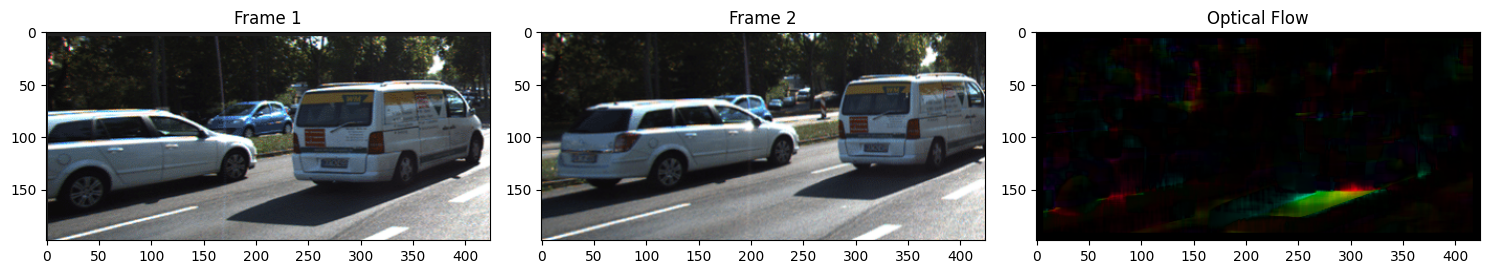

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class OpticalFlowComputer:
    def __init__(self, window_size=15, max_iterations=10, epsilon=0.01):
        """
        Initialize Optical Flow Computer with Lucas-Kanade method

        Args:
            window_size (int): Size of the neighborhood considered
            max_iterations (int): Maximum number of iterations for optimization
            epsilon (float): Convergence threshold
        """
        self.window_size = window_size
        self.max_iterations = max_iterations
        self.epsilon = epsilon

    def compute_derivatives(self, frame1, frame2):
        """
        Compute spatial and temporal image derivatives

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image

        Returns:
            tuple: Ix (x derivative), Iy (y derivative), It (temporal derivative)
        """
        # Sobel derivatives for spatial gradients
        Ix = cv2.Sobel(frame1, cv2.CV_64F, 1, 0, ksize=3)
        Iy = cv2.Sobel(frame1, cv2.CV_64F, 0, 1, ksize=3)

        # Temporal derivative
        It = frame2 - frame1

        return Ix, Iy, It

    def lucas_kanade_flow(self, frame1, frame2):
        """
        Compute optical flow using Lucas-Kanade method

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image

        Returns:
            tuple: u (x-flow), v (y-flow)
        """
        # Ensure images are grayscale
        if len(frame1.shape) > 2:
            frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        if len(frame2.shape) > 2:
            frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        # Ensure same image size
        assert frame1.shape == frame2.shape, "Images must be the same size"

        # Compute image derivatives
        Ix, Iy, It = self.compute_derivatives(frame1, frame2)

        # Initialize flow fields
        height, width = frame1.shape
        u = np.zeros((height, width), dtype=np.float32)
        v = np.zeros((height, width), dtype=np.float32)

        # Half window size
        half_window = self.window_size // 2

        # Compute flow for each pixel
        for y in range(half_window, height - half_window):
            for x in range(half_window, width - half_window):
                # Extract local image patch
                ix_patch = Ix[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()
                iy_patch = Iy[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()
                it_patch = It[y-half_window:y+half_window+1,
                              x-half_window:x+half_window+1].flatten()

                # Construct linear system
                A = np.column_stack((ix_patch, iy_patch))
                b = -it_patch

                # Solve using least squares
                try:
                    flow = np.linalg.lstsq(A, b, rcond=None)[0]
                    u[y, x], v[y, x] = flow
                except np.linalg.LinAlgError:
                    u[y, x], v[y, x] = 0, 0

        return u, v

    def visualize_flow(self, frame1, frame2, u, v, title='Optical Flow'):
        """
        Visualize optical flow using color coding

        Args:
            frame1 (np.ndarray): First grayscale image
            frame2 (np.ndarray): Second grayscale image
            u (np.ndarray): X-direction flow
            v (np.ndarray): Y-direction flow
            title (str): Plot title
        """
        # Normalize flow for visualization
        mag, ang = cv2.cartToPolar(u, v)
        hsv = np.zeros((frame1.shape[0], frame1.shape[1], 3), dtype=np.uint8)

        # Encode flow direction in hue
        hsv[..., 0] = ang * 180 / np.pi / 2
        # Encode flow magnitude in value channel
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        hsv[..., 1] = 255

        # Convert HSV to BGR
        flow_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        # Plotting
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.title('Frame 1')
        plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB) if len(frame1.shape) == 3 else frame1, cmap='gray')

        plt.subplot(132)
        plt.title('Frame 2')
        plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB) if len(frame2.shape) == 3 else frame2, cmap='gray')

        plt.subplot(133)
        plt.title(title)
        plt.imshow(cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))

        plt.tight_layout()
        plt.show()

def compute_optical_flow_from_user_images(image1_path, image2_path):
    """
    Compute optical flow from user-provided image paths

    Args:
        image1_path (str): Path to first image
        image2_path (str): Path to second image
    """
    # Read images
    frame1 = cv2.imread(image1_path)
    frame2 = cv2.imread(image2_path)

    # Validate image loading
    if frame1 is None or frame2 is None:
        raise ValueError("Could not read one or both images. Please check file paths.")

    # Resize images to same dimensions if needed
    if frame1.shape[:2] != frame2.shape[:2]:
        print("Images have different sizes. Resizing to match first image's dimensions.")
        frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))

    # Initialize optical flow computer
    of_computer = OpticalFlowComputer()

    # Compute optical flow
    u, v = of_computer.lucas_kanade_flow(frame1, frame2)

    # Visualize results
    of_computer.visualize_flow(frame1, frame2, u, v)

def main():
    # Prompt user for image paths
    image1_path = input("Enter the path to the first image: ")
    image2_path = input("Enter the path to the second image: ")

    try:
        compute_optical_flow_from_user_images(image1_path, image2_path)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

Enter path to previous frame image: /content/image-1.png
Enter path to next frame image: /content/image-2.png
Resizing images to match dimensions.
Computing Lucas-Kanade Optical Flow...


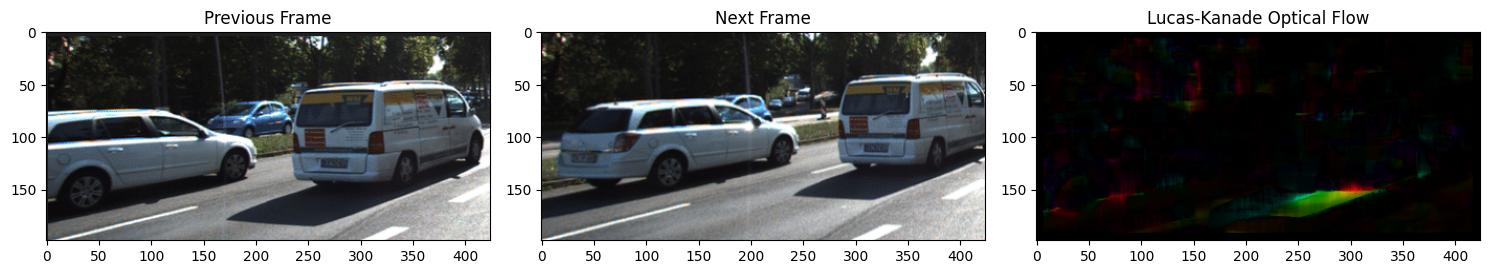

Computing Horn-Schunck Optical Flow...


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class OpticalFlowComputer:
    def __init__(self, method='lucas-kanade'):
        """
        Initialize Optical Flow Computer

        Args:
            method (str): Optical flow computation method
        """
        self.method = method

    def compute_lucas_kanade_flow(self, prev_frame, next_frame, window_size=15):
        """
        Compute optical flow using Lucas-Kanade method
        Addresses the aperture problem by local estimation

        Args:
            prev_frame (np.ndarray): Previous frame
            next_frame (np.ndarray): Next frame
            window_size (int): Size of local neighborhood

        Returns:
            tuple: Optical flow (u, v) vectors
        """
        # Ensure grayscale
        if len(prev_frame.shape) > 2:
            prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
            next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        else:
            prev_gray = prev_frame
            next_gray = next_frame

        # Compute image derivatives
        dx = cv2.Sobel(prev_gray, cv2.CV_64F, 1, 0, ksize=3)
        dy = cv2.Sobel(prev_gray, cv2.CV_64F, 0, 1, ksize=3)
        dt = next_gray - prev_gray

        # Initialize flow fields
        height, width = prev_gray.shape
        u = np.zeros_like(prev_gray, dtype=np.float32)
        v = np.zeros_like(prev_gray, dtype=np.float32)

        # Half window size
        half_win = window_size // 2

        # Compute flow for each pixel in local neighborhood
        for y in range(half_win, height - half_win):
            for x in range(half_win, width - half_win):
                # Extract local image patches
                local_dx = dx[y-half_win:y+half_win+1, x-half_win:x+half_win+1].flatten()
                local_dy = dy[y-half_win:y+half_win+1, x-half_win:x+half_win+1].flatten()
                local_dt = dt[y-half_win:y+half_win+1, x-half_win:x+half_win+1].flatten()

                # Construct linear system
                A = np.column_stack([local_dx, local_dy])
                b = -local_dt

                # Solve using least squares (addressing ill-posed problem)
                try:
                    flow = np.linalg.lstsq(A, b, rcond=None)[0]
                    u[y, x], v[y, x] = flow
                except np.linalg.LinAlgError:
                    u[y, x] = v[y, x] = 0

        return u, v

    def compute_horn_schunck_flow(self, prev_frame, next_frame, alpha=1.0, iterations=100):
        """
        Compute optical flow using Horn-Schunck global method
        Addresses global smoothness constraint

        Args:
            prev_frame (np.ndarray): Previous frame
            next_frame (np.ndarray): Next frame
            alpha (float): Smoothness weight
            iterations (int): Number of iterations

        Returns:
            tuple: Optical flow (u, v) vectors
        """
        # Ensure grayscale
        if len(prev_frame.shape) > 2:
            prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
            next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
        else:
            prev_gray = prev_frame
            next_gray = next_frame

        # Compute derivatives
        dx = cv2.Sobel(prev_gray, cv2.CV_64F, 1, 0, ksize=3)
        dy = cv2.Sobel(prev_gray, cv2.CV_64F, 0, 1, ksize=3)
        dt = next_gray - prev_gray

        # Initialize flow fields
        height, width = prev_gray.shape
        u = np.zeros_like(prev_gray, dtype=np.float32)
        v = np.zeros_like(prev_gray, dtype=np.float32)

        # Iterative refinement
        for _ in range(iterations):
            # Compute local averages of flow
            u_avg = np.zeros_like(u)
            v_avg = np.zeros_like(v)

            for y in range(1, height-1):
                for x in range(1, width-1):
                    u_avg[y, x] = (u[y+1, x] + u[y-1, x] +
                                   u[y, x+1] + u[y, x-1]) / 4
                    v_avg[y, x] = (v[y+1, x] + v[y-1, x] +
                                   v[y, x+1] + v[y, x-1]) / 4

            # Update flow vectors
            for y in range(1, height-1):
                for x in range(1, width-1):
                    # Compute optical flow update
                    numerator = (dx[y,x]*u_avg[y,x] +
                                 dy[y,x]*v_avg[y,x] + dt[y,x])
                    denominator = (alpha**2 + dx[y,x]**2 + dy[y,x]**2)

                    u[y, x] = u_avg[y, x] - dx[y,x] * numerator / denominator
                    v[y, x] = v_avg[y, x] - dy[y,x] * numerator / denominator

        return u, v

    def visualize_flow(self, prev_frame, next_frame, u, v, title='Optical Flow'):
        """
        Visualize optical flow using color coding

        Args:
            prev_frame (np.ndarray): Previous frame
            next_frame (np.ndarray): Next frame
            u (np.ndarray): X-direction flow
            v (np.ndarray): Y-direction flow
            title (str): Plot title
        """
        # Compute magnitude and angle
        mag, ang = cv2.cartToPolar(u, v)

        # Normalize magnitude
        mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # Create HSV representation
        hsv = np.zeros((u.shape[0], u.shape[1], 3), dtype=np.uint8)
        hsv[..., 0] = ang * 180 / np.pi / 2  # Hue represents direction
        hsv[..., 1] = 255  # Saturation
        hsv[..., 2] = mag  # Value represents magnitude

        # Convert to BGR
        flow_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        # Visualization
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.title('Previous Frame')
        plt.imshow(cv2.cvtColor(prev_frame, cv2.COLOR_BGR2RGB) if len(prev_frame.shape) == 3 else prev_frame, cmap='gray')

        plt.subplot(132)
        plt.title('Next Frame')
        plt.imshow(cv2.cvtColor(next_frame, cv2.COLOR_BGR2RGB) if len(next_frame.shape) == 3 else next_frame, cmap='gray')

        plt.subplot(133)
        plt.title(title)
        plt.imshow(cv2.cvtColor(flow_color, cv2.COLOR_BGR2RGB))

        plt.tight_layout()
        plt.show()

def main():
    # Get image paths from user
    prev_image_path = input("Enter path to previous frame image: ")
    next_image_path = input("Enter path to next frame image: ")

    # Read images
    prev_frame = cv2.imread(prev_image_path)
    next_frame = cv2.imread(next_image_path)

    # Validate and resize if needed
    if prev_frame is None or next_frame is None:
        raise ValueError("Could not read images. Check file paths.")

    if prev_frame.shape[:2] != next_frame.shape[:2]:
        print("Resizing images to match dimensions.")
        next_frame = cv2.resize(next_frame, (prev_frame.shape[1], prev_frame.shape[0]))

    # Create optical flow computer
    of_computer = OpticalFlowComputer()

    # Compute Lucas-Kanade flow
    print("Computing Lucas-Kanade Optical Flow...")
    u_lk, v_lk = of_computer.compute_lucas_kanade_flow(prev_frame, next_frame)
    of_computer.visualize_flow(prev_frame, next_frame, u_lk, v_lk, 'Lucas-Kanade Optical Flow')

    # Compute Horn-Schunck flow
    print("Computing Horn-Schunck Optical Flow...")
    u_hs, v_hs = of_computer.compute_horn_schunck_flow(prev_frame, next_frame)
    of_computer.visualize_flow(prev_frame, next_frame, u_hs, v_hs, 'Horn-Schunck Optical Flow')

if __name__ == "__main__":
    main()